# ORIE 4580/5580/5581 Assignment 6

#### Students: A. Elison (ahe45)

### Github link: https://github.com/Abbie000/ORIE-4580-HWs/blob/main/ORIE_4580_HW_6.ipynb

### Instructions


* Due Thursday, November 19, at 11:59 pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Essential reading

The chapters on [Poisson Process](https://canvas.cornell.edu/courses/80773/modules/items/3269525), [DTMCs](https://canvas.cornell.edu/courses/80773/modules/items/3426077) and [CTMCs](https://canvas.cornell.edu/courses/80773/modules/items/3426086) from Mor Harchol-Balter, posted on Canvas

<hr><hr>

# Question 1 (The Spotify Shuffle)

**(a)** (10 pts) You have a Spotify playlist with $n$ songs playing on shuffle. Suppose Spotify truly picks a random song each time -- you want to see how many songs it takes on average to play **every song** on your playlist. Build a simulator to estimate this for a different values of $n$, and use this to try and guess the function.

*Note 1*: We saw this in class as the `coupon collector' problem -- we also saw a way to compute the exact expected time in an earlier clicker question...

*Note 2*: Try and pick a large range of $n$ to get a sense of the function, and also make sure you always show your CIs!


<hr>

## Ans.

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

Running n=5, trials=20000...
Running n=10, trials=15000...
Running n=20, trials=12000...
Running n=50, trials=10000...
Running n=100, trials=8000...
Running n=200, trials=5000...
Running n=500, trials=3000...
Running n=1000, trials=2000...

Simulation Results:
      n  trials         mean          std         se     ci_lower  \
0     5   20000    11.324850     4.965527   0.035112    11.256031   
1    10   15000    29.202667    11.078720   0.090457    29.025370   
2    20   12000    72.223833    23.872974   0.217929    71.796692   
3    50   10000   225.460400    61.424201   0.614242   224.256486   
4   100    8000   519.130250   125.472542   1.402826   516.380712   
5   200    5000  1166.886600   248.667969   3.516696  1159.993876   
6   500    3000  3376.496667   629.589327  11.494676  3353.967102   
7  1000    2000  7479.272000  1281.824613  28.662470  7423.093559   

      ci_upper  theoretical  
0    11.393669    11.416667  
1    29.379963    29.289683  
2    72.650975    71.954793

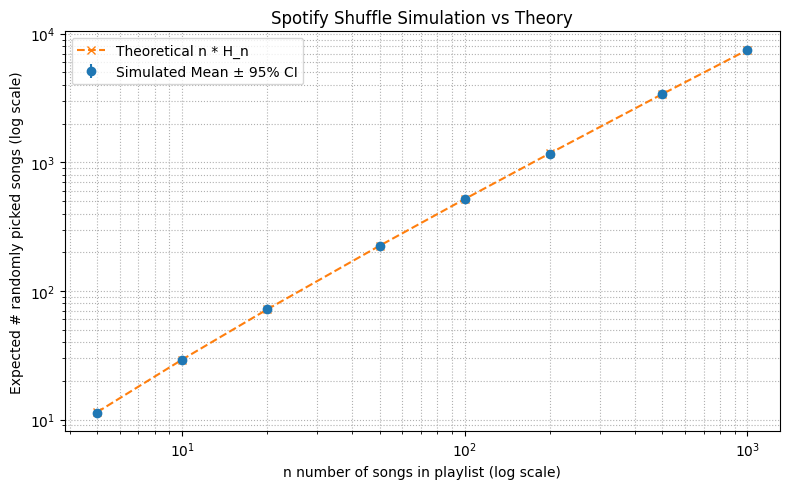

In [14]:
# Set seed for reproducibility
np.random.seed(0)

# Simulation of one run of coupon collector
def simulate_one(n):
    seen = np.zeros(n, dtype=bool)
    count_seen = 0
    draws = 0

    # Larger n → use larger batch for speed
    batch_size = max(100, n)

    while count_seen < n:
        picks = np.random.randint(0, n, size=batch_size)
        for p in picks:
            draws += 1
            if not seen[p]:
                seen[p] = True
                count_seen += 1
                if count_seen == n:
                    break
    return draws

# Run simulations and compute CI
def run_simulations(n, trials):
    results = np.zeros(trials, dtype=int)

    for i in range(trials):
        results[i] = simulate_one(n)

    mean = results.mean()
    std = results.std(ddof=1)
    se = std / math.sqrt(trials)
    ci_low = mean - 1.96 * se
    ci_high = mean + 1.96 * se

    # Theoretical n * H_n
    harmonic = np.sum(1 / np.arange(1, n+1))
    theoretical = harmonic * n

    return {
        "n": n,
        "trials": trials,
        "mean": mean,
        "std": std,
        "se": se,
        "ci_lower": ci_low,
        "ci_upper": ci_high,
        "theoretical": theoretical
    }

# Choose n and number of simulations
n_values = [5, 10, 20, 50, 100, 200, 500, 1000]
num_sim = {5:20000, 10:15000, 20:12000, 50:10000,
             100:8000, 200:5000, 500:3000, 1000:2000}

summary = []

for n in n_values:
    trials = num_sim[n]
    print(f"Running n={n}, trials={trials}...")
    stats = run_simulations(n, trials)
    summary.append(stats)

# Convert to a DataFrame
df = pd.DataFrame(summary)
print("\nSimulation Results:")
print(df)

# Plot results
plt.figure(figsize=(8,5))

plt.errorbar(df["n"], df["mean"],
             yerr=[df["mean"] - df["ci_lower"], df["ci_upper"] - df["mean"]],
             fmt='o', label="Simulated Mean ± 95% CI")

plt.plot(df["n"], df["theoretical"], 'x--', label="Theoretical n * H_n")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("n number of songs in playlist (log scale)")
plt.ylabel("Expected # randomly picked songs (log scale)")
plt.title("Spotify Shuffle Simulation vs Theory")
plt.grid(True, which="both", ls=":")
plt.legend()
plt.tight_layout()
plt.show()

<hr>

**(b)** (10 pts) Suppose Spotify uses the following poor randomizer: it labels songs as $\{0,1,2,\ldots,n-1\}$, and after playing a song $i$, it then either plays song $(i+1) mod(n)$ or $(i-1)mod(n)$ with probability $1/2$ (i.e., the next or previous song, imagining the songs to be in a ring with $n-1$ wrapping around to $1$). Simulate this randomizer for $n=20$, assuming you always start at song $1$, and find the histogram of the *last song to be played* for the first time using this shuffler.   


<hr>

## Ans.

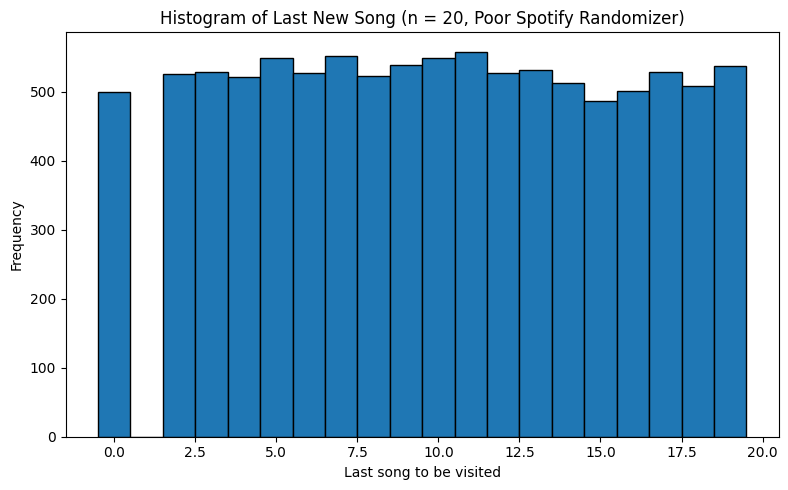

First 10 results: [17 19 19  6 18  2  3 14 18 13]
Mean last song index: 9.9188


In [7]:
# Set seed for reproducibility
np.random.seed(0)

def simulate_last_song(n=20, start=1):
    """
    Simulate the poor Spotify shuffler.
    Songs are arranged in a ring {0,1,...,n-1}.
    Start at song `start`.
    Each step: move left or right with probability 1/2.
    Return the last new song visited.
    """
    visited = np.zeros(n, dtype=bool)
    visited[start] = True
    curr = start
    count = 1
    last_new = None

    while count < n:
        step = np.random.choice([-1, 1])  # left or right
        curr = (curr + step) % n          # (𝑖+1)𝑚𝑜𝑑(𝑛) or (𝑖−1)𝑚𝑜𝑑(𝑛)
        if not visited[curr]:
            visited[curr] = True
            count += 1
            last_new = curr
    return last_new


# Run many simulations
n = 20
trials = 10000
results = np.array([simulate_last_song(n, start=1) for _ in range(trials)])

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(results, bins=np.arange(-0.5, n, 1), edgecolor='black')
plt.xlabel("Last song to be visited")
plt.ylabel("Frequency")
plt.title("Histogram of Last New Song (n = 20, Poor Spotify Randomizer)")
plt.tight_layout()
plt.show()

# Print some quick stats
print("First 10 results:", results[:10])
print("Mean last song index:", results.mean())

<hr><hr>

# Question 2 (The Gambler's Ruin)


In class, we saw the balanced gambler's ruin problem: two gambler's $A$ and $B$ start with $\$a$ and $\$b$ initially, and play a sequence of games, where each game is won by either player with probability $1/2$, with the winner giving $\$ 1$ to the loser. Play goes on till one player runs out of money.

<hr>

**(a)** (5 pts) We argued that when both players have the same initial budget, then each player is equally likely to win. We now want to run a simulation to find a similar formula for general initial budgets. To do so, assume the total budget is $a+b=20$, and run simulations to find the expected probability that $A$ wins for all values of $a$ from $\{0,1,\ldots,20\}$. Plot these, and use this to conjecture what the formula may be.


<hr>

## Ans.

In [4]:
def gamblers_ruin(a, b, trials):
    """
    Simulate the balanced gambler's ruin problem.
    A starts with $a, B starts with $b.
    Return probability A wins and distribution of game lengths.
    """
    A_wins = 0
    lengths = []

    for _ in range(trials):
        A = a
        B = b
        steps = 0

        # simulate until one gambler is ruined
        while A > 0 and B > 0:
            steps += 1
            if np.random.rand() < 0.5:
                # A wins $1 from B
                A += 1
                B -= 1
            else:
                # B wins $1 from A
                A -= 1
                B += 1

        # record result
        if A > 0:
            A_wins += 1
        lengths.append(steps)

    return A_wins / trials, np.array(lengths)

In [22]:
total_budget = 20
a_values = np.arange(21)    # initial money for A is {0,1,...,20}
trials = 20000

prob_A_wins = []
ci_low = []
ci_high = []

for a in a_values:
  b = total_budget - a       # initial money for B
  prob_A_wins_a, game_lengths = gamblers_ruin(a, b, trials)
  prob_A_wins.append(prob_A_wins_a)

  # Compute 95% CI for Bernoulli outcomes
  se = math.sqrt(prob_A_wins_a * (1 - prob_A_wins_a) / trials)
  ci_low.append(prob_A_wins_a - 1.96 * se)
  ci_high.append(prob_A_wins_a + 1.96 * se)


prob_A_wins = np.array(prob_A_wins)
ci_low = np.array(ci_low)
ci_high = np.array(ci_high)

# Theoretical curve: P(A wins) = a / (a + b) = a / 20
theoretical = a_values / total_budget

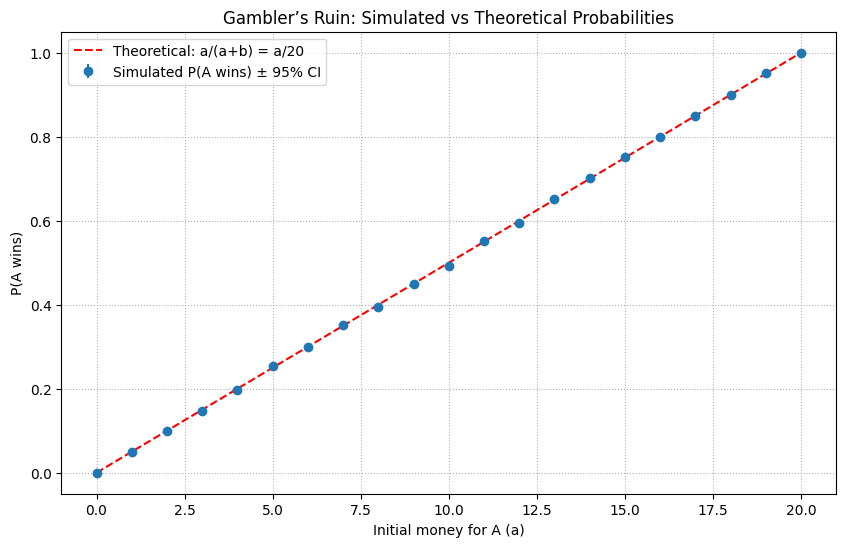

In [26]:
# Plot everything
plt.figure(figsize=(10,6))

# Simulated estimates
plt.errorbar(
    a_values,
    prob_A_wins,
    yerr=[prob_A_wins - ci_low, ci_high - prob_A_wins],
    fmt='o',
    label="Simulated P(A wins) ± 95% CI")

# Theoretical line
plt.plot(a_values, theoretical, 'r--', label="Theoretical: a/(a+b) = a/20")

plt.xlabel("Initial money for A (a)")
plt.ylabel("P(A wins)")
plt.title("Gambler’s Ruin: Simulated vs Theoretical Probabilities")
plt.grid(True, linestyle=':')
plt.legend()

plt.show()

**(b)** (10 pts) Another question we can ask is how long it takes for either player to get ruined. To study this, simulate the gambler's ruin for a range of values of $a$ and $b$, and use this to try and guess the expected time to ruin.

Note: Convince yourself that the function must be symmetric in $a$ and $b$, so you can assume $a\leq b$. Try plotting the expected absorption times for selected values of $a$, while varying $b$.


<hr>

## Ans.

In [3]:
np.random.seed(0)

# Simulate one game and return time to ruin
def absorption_time(a, b):
    A, B = a, b
    t = 0
    while A > 0 and B > 0:
        t += 1
        if np.random.rand() < 0.5:
            A += 1
            B -= 1
        else:
            A -= 1
            B += 1
    return t


# Estimate expected absorption time (with CI)
def estimate_absorption_time(a, b, trials=3000):
    times = [absorption_time(a, b) for _ in range(trials)]
    mean = np.mean(times)
    sd = np.std(times, ddof=1)
    se = sd / math.sqrt(trials)
    ci_low = mean - 1.96 * se
    ci_high = mean + 1.96 * se
    return mean, ci_low, ci_high

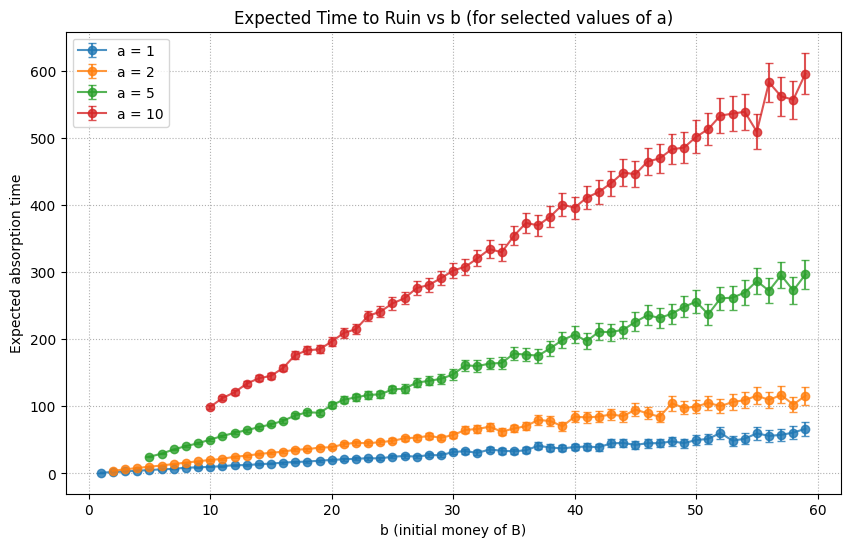

In [5]:
# Main experiment
a_values = [1, 2, 5, 10]      # choose some a-values
b_range = np.arange(1, 60)    # explore b up to 60
trials = 3000

plt.figure(figsize=(10, 6))

for a in a_values:
    means = []
    ci_lows = []
    ci_highs = []
    bs = []

    for b in b_range:
        if b < a:
            continue  # symmetry: only need a ≤ b
        mean, ci_low, ci_high = estimate_absorption_time(a, b, trials)
        bs.append(b)
        means.append(mean)
        ci_lows.append(ci_low)
        ci_highs.append(ci_high)

    bs = np.array(bs)
    means = np.array(means)
    ci_lows = np.array(ci_lows)
    ci_highs = np.array(ci_highs)

    # Plot with CI error bars
    plt.errorbar(
        bs,
        means,
        yerr=[means - ci_lows, ci_highs - means],
        fmt='o-',
        label=f"a = {a}",
        alpha=0.8,
        capsize=3)

plt.xlabel("b (initial money of B)")
plt.ylabel("Expected absorption time")
plt.title("Expected Time to Ruin vs b (for selected values of a)")
plt.grid(True, linestyle=':')
plt.legend()
plt.show()

<hr>

**(c)** (OPTIONAL) For parts $(a)$ and $(b)$, try and theoretically prove what you observe from your simulations!


<hr>

## Ans.

<hr><hr>

# Question 3 (Staffing a hospital)

Consider the model of the Fingerlakes Regional Hospital as shown below. New patients arrive at the reception at a rate of 20/hr and emergency patients enter the ER at a rate of 5/hr. The reception desk for non-emergency patients is managed by $n_R$ associates. Admission at the reception (not counting any queueing time) takes 5 minutes on average, regardless of whether the non-emergency patient is first-time or returning. The clinic is served by $d_C$ doctors with an average visit time of 15 minutes. About one in every four patients visiting the clinic are asked to return for a follow-up appointment that is, on average, 3 weeks (504 hours) later in time; another one-tenth of visitors to the clinic are referred to the internal ward (IW); the rest are treated and discharged. Patients arriving to the ER require about 1 hour of time with a doctor. The ER is staffed by $d_E$ doctors. Half of the patients in the ER are discharged after treatment, with the remainder referred to the IW. The average stay in the IW is about 72 hours and there are $n_I$ IW beds available. After a stay at the IW, 20\% of patients are discharged, whereas the rest are asked to return for a follow-up appointment as a non-emergency patient that is, on average, 3 weeks (504 hours) later in time. The reception, clinic, ER and IW all have their separate waiting areas and wait-lists, and serve patients on a FCFS basis.

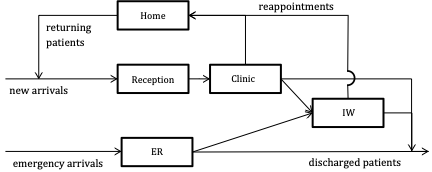

**(a)** (5 pts)  Find bounds on the number of receptionists $n_R$, IW beds $N_I$, clinic doctors $d_C$ and ER doctors $d_E$ that the hospital requires to ensure it can keep up with its patient load.

<hr>

## Ans.

**(1) Find effective arrival rates**

Arrival rates:
- external non-emergency arrival rate to reception = $20$ / hr
- external ER arrival rate $λ^{ext}_{ER} = 5$ / hr

Let:
- $λ_R$ = throughput (arrival rate to the reception (and hence the clinic)
- $λ_C$ = throughput of the clinic ($λ_R=λ_C$)
- $λ_I$ = arrival rate into the internal ward (IW)

Routing fractions (given in the problem statement):
- from the clinic:
  - fraction of patients scheduled for a follow-up (return as non-emergency): $f_{clinic -> follow-up} = \frac{1}{4}$
  - fraction of patients referred to the IW: $f_{clinic -> IW} = \frac{1}{10}$
  - rest discharged
- from ER:
  - fraction referred to the IW: $f_{ER -> IW} = \frac{1}{2}$
  - fraction discharged: $f_{ER -> discharged} = \frac{1}{2}$
- from IW on discharge:
  - fraction that return later as non-emergency: $f_{IW -> follow-up} = 0.8$
  - fraction that are discharged: 0.2

Since in steady state, the rates of scheduling follow-ups equal the later return arrival rates (constant flow over time), we can write flow-balance equations:

As assumed above, clinic throughput = reception throughput: $λ_R = λ_C$.


Reception receives:

$λ_R = 20 + f_{clinic -> follow-up} λ_C + f_{IW -> follow-up}λ_I = 20 + 0.25λ_C + 0.8λ_I$

Since $λ_R = λ_C$,

$λ_C = 20 + 0.25λ_C + 0.8λ_I \implies 0.75λ_C = 20 + 0.8λ_I \quad (1)$

IW arrival rate comes from the clinic referrals and ER referrals:

$λ_I = f_{clinic -> IW}λ_C + f_{ER -> IW}λ^{ext}_{ER} = 0.1λ_C + 0.5 ⋅ 5 = 0.1λ_C + 2.5 \quad (2)$

Plugging $(2)$ into $(1)$, we get:

$0.75λ_C = 20 + 0.8λ_I$

$\implies 0.75λ_C = 20 + 0.8(0.1λ_C + 2.5) = 20 + 0.08λ_C + 2$

$\implies 0.67λ_C = 22$

$\implies λ_C = λ_R = \frac{22}{0.67} ≈ 32.836$ patients/hour

So

$λ_I = 0.1 ⋅ 32.836 + 2.5 ≈ 5.784$ patients / hour


**(2) Find service rates**

Service times (given in the problem statement):
- Reception: $5$ minutes = $\frac{5}{60}$ hr = $\frac{1}{12}$ hr → service rate per receptionist $μ_R = 12$ patients / hr
- Clinic doctor: $15$ minutes = $0.25$ hr → $μ_C = 4$ patients/hr per doctor.
- ER doctor: $1$ hour = $1$ hr → $μ_E = 1$ patient/hr per ER doctor.
- IW bed: mean length of stay $72$ hr → a bed serves $\frac{1}{72}$ patient/hr (equivalently mean occupancy per arrival = $72$ hrs).

Let traffic $a = λ ⋅ mean \, service \, time = \frac{λ}{μ}$


**(3) Find minimal staffing bounds for stability**

Constraint: total offered patient load is strictly less than the total service capacity → per-server utilization $< 1$

Receptionists:
- offered work: $a_R = λ_R ⋅ \frac{1}{12} = \frac{λ_R}{12}$

  $\implies a_R ≈ \frac{32.836}{12} ≈ 2.736$
- Need $n_R > a_R →$ minimal integer $n_R = ⌈a_R⌉ = ⌈2.736⌉ = 3$ receptionists

Clinic doctors:
- offered work: $a_C = λ_C ⋅ 0.25$
  
  $\implies a_C ≈ 32.836 ⋅ 0.25 ≈ 8.209$
- Need $d_C > a_C →$ minimal integer $d_C = ⌈8.209⌉ = 9$ clinic doctors

ER doctors:
- offered work: $a_E = λ_{ER}^{ext} ⋅ 1 = 5$
- Need $d_E > 5 →$ minimal integer $d_E = 6$ ER doctors

IW beds:
- Mean occupancy by Little's Law: average number of patients in the IW
  $L_I = λ_I ⋅ mean \, stay = λ_I ⋅ 72$

  $\implies L_I ≈ 5.784 ⋅ 72 ≈ 416.4$ beds occupied on average
- Hence, to carry the mean patient load, the hospital needs at least $N_I ≥ ⌈416.4⌉ = 417$ IW beds


**(4) Final lower bounds**

To ensure the hospital can keep up with its patient load:
- Receptionists: $n_R ≥ 3$ receptionists
- Clinic doctors: $d_C ≥ 9$ doctors
- ER doctors: $d_E ≥ 6$ doctors
- IW beds: $N_I ≥ 417$ beds

<hr>

**(b)** (10 pts) Suppose the hospital chooses to run with $d_E=7$ doctors in the ER, $d_C=10$ doctors in the clinic, and $n=500$ beds in the IW. Approximate the average time spent in the clinic (including treatment but not including reception) and the average number of busy clinic doctors.

<hr>

## Ans.

**Relevant parameters**
- Clinic throughput: $λ_C ≈ 32.836$ patients/hour
- Service rate per clinic doctor: $15$ min/patient $\implies μ_C = 4$ patients/hour
- Number of clinic doctors: $d_C = 10$

Patient traffic / load:
- Offered patient load: $a = \frac{λ_C}{μ_C} ≈ \frac{32.836}{4} ≈ 8.209$
- Per-server utilization: $ρ = \frac{a}{d_C} ≈ 0.8209$
  (This means that each doctor is busy $~82.09\%$ of the time.)


**Calculate the approximate average time spent in the clinic**

Using the Erlang-C $(M/M/d_C$ queue) normalization formula (see the computations in the code block below):

$ℙ_0 = [∑_{n=0}^{d_C-1} \frac{a^n}{n!} + \frac{a^{d_C}}{d_C!(1-ρ)}]^{-1}$

$ℙ_{wait} = ℙ(all \, doctors \, busy) = \frac{a^{d_C}}{d_C!(1-ρ)} ℙ_{wait} ≈ 0.4574 = 45.74\%$

So around $45.74\%$ of clinic arrivals wait.


**Calculate the average waiting time in the queue**

I use the $M/M/d_C$ formula:
$$W_q = \frac{ℙ_{wait}}{d_Cμ - λ_c} = \frac{0.4574}{10(4)-32.836} $$

$$W_q ≈ 0.0638 \, hours ≈ 3.828 \, min$$
where:
- $c_μ =$ total service rate of all doctors
- $c_μ - λ =$ the "excess" capacity / slack that clears the queue


**Calculate the average time spent in the clinic (excluding reception)**

$W = waiting \, time + treatment \, time$

$W = W_q + \frac{1}{μ}$

$W ≈ 3.828 + 15 ≈ 18.828$ min


**Calculate the average number of busy clinic doctors**

$Busy \, doctors = \frac{λ_C}{μ} = \frac{32.836}{4} ≈ 8.209$

**Thus, the average time spent in the clinic (excluding reception) is $\sim 18.828$ min and, on average, $8.209$ clinic doctors are busy and $1.791$ clinic doctors are idle.**

In [2]:
lambda_C = 32.83582089552239
mu = 4.0
c = 10

a = lambda_C / mu

# Poisson tail approx: P(Poisson(a) >= c)
poisson_tail = 1.0 - sum(math.exp(-a) * a**n / math.factorial(n) for n in range(c))

# Exact Erlang-C P_wait
rho = a / c
sum_terms = sum(a**n / math.factorial(n) for n in range(c))
last = a**c / (math.factorial(c) * (1 - rho))
P0 = 1.0 / (sum_terms + last)
erlang_c_Pwait = (a**c / (math.factorial(c) * (1 - rho))) * P0

print("a (offered load)     =", a)
print("Poisson approx P(wait)=", poisson_tail)
print("Erlang-C P(wait)      =", erlang_c_Pwait)

a (offered load)     = 8.208955223880597
Poisson approx P(wait)= 0.3096171370977877
Erlang-C P(wait)      = 0.4573994642037427


<hr>

**(c)** (10 pts) Suppose the hospital chooses to run with $d_E=7$ doctors in the ER, $d_C=10$ doctors in the clinic, and $n=500$ beds in the IW. Compute the probability that the hospital will simultaneously have no patients in the ER and no patients in the clinic.

<hr>

## Ans.

$ℙ(no \, patients \, in \, the \, ER \, and \, no \, patients \, in \, the \, clinic) = ℙ(no \, patients \, in \, the \, ER) ⋅ ℙ(no \, patients \, in \, the \, clinic)$

$≈ 1.278 ⋅ 10^{-6}$ (See the computation in the code block below.)

So there's an incredibly low chance of the hospital and ER simultaneously having no patients.

In [5]:
def P0_erlang(a, c):
    rho = a / c
    if rho >= 1.0:
        return 0.0  # unstable (no steady-state P0)
    sum_terms = sum(a**n / math.factorial(n) for n in range(c))
    last = a**c / (math.factorial(c) * (1.0 - rho))
    P0 = 1.0 / (sum_terms + last)
    return P0

# parameters
lambda_C = 32.83582089552239
mu_C = 4.0
cC = 10

lambda_E = 5.0
mu_E = 1.0
cE = 7

aC = lambda_C / mu_C
aE = lambda_E / mu_E

P0_clinic = P0_erlang(aC, cC)
P0_ER = P0_erlang(aE, cE)
joint_prob = P0_clinic * P0_ER

print("P0 clinic =", P0_clinic)
print("P0 ER     =", P0_ER)
print("Joint prob both empty ≈", joint_prob)

P0 clinic = 0.00021393717652703727
P0 ER     = 0.005974731863162044
Joint prob both empty ≈ 1.2782172653110124e-06


<hr>

**(d)** (40 pts) Build a simulator for the above model, assuming the external arrivals to the reception and ER are Poisson processes, and all service times are exponential and all routings are independent. You can re-use any of the code we provided in the recitations.

Use your simulator to study the following:

$(i)$ Plot the total number of patients waiting in the hospital when the number of doctors and beds is $1$ more than your suggestions in part $(a)$, and when it is $1$ less than your suggestions in part $(a)$. You should simulate over a long enough time horizon to be able to determine whether the numbers stabilize, or grow unbounded.

$(ii)$ Simulate the configuration in part $(b)$, and plot the average time spent by patients in the clinic, and the average number of busy clinic doctors. How do these compare to the answers in part $(b)$?

<hr>

## Ans.

In [6]:
import heapq
import random
from collections import deque

In [7]:
# Exponential draw
exp = lambda rate: np.random.exponential(1/rate)

# Event types
ARR_RECP = 1     # arrival to reception (external)
ARR_ER   = 2     # arrival to ER (external)
DONE_RECP = 3    # finished at reception
DONE_CLINIC = 4  # finished clinic
DONE_ER = 5      # finished ER
DONE_IW = 6      # finished IW


# Hospital simulator
def simulate_hospital(nR, dC, dE, nI,T=50000, lambda_R=20, lambda_ER=5,seed=0):

    random.seed(seed)
    np.random.seed(seed)

    # state
    time = 0

    # queues
    Q_recp = deque()
    Q_clinic = deque()
    Q_ER = deque()
    Q_IW = deque()

    # number busy
    busy_R = 0
    busy_C = 0
    busy_E = 0
    busy_I = 0

    # statistics
    clinic_times = []
    clinic_busy_samples = []

    # event priority queue
    events = []
    push = lambda t, etype, data=None: heapq.heappush(events, (t, etype, data))

    # initial arrivals
    push(exp(lambda_R), ARR_RECP)
    push(exp(lambda_ER), ARR_ER)

    # SIMULATION
    while time < T:

        time, etype, data = heapq.heappop(events)

        # Sample clinic utilization
        clinic_busy_samples.append(busy_C)


        # 1. External arrivals
        if etype == ARR_RECP:
            # schedule next arrival
            push(time + exp(lambda_R), ARR_RECP)

            # arrival joins reception queue
            Q_recp.append(time)

            if busy_R < nR:
                busy_R += 1
                start = Q_recp.popleft()
                push(time + exp(1/5), DONE_RECP)  # 5 minutes = 1/5 hour

        elif etype == ARR_ER:
            push(time + exp(lambda_ER), ARR_ER)

            Q_ER.append(time)
            if busy_E < dE:
                busy_E += 1
                start = Q_ER.popleft()
                push(time + exp(1/1), DONE_ER)  # 1 hour


        # 2. Departures from reception → clinic
        elif etype == DONE_RECP:
            busy_R -= 1

            # next in reception
            if Q_recp:
                busy_R += 1
                start = Q_recp.popleft()
                push(time + exp(1/5), DONE_RECP)

            # route into clinic queue
            Q_clinic.append(time)
            if busy_C < dC:
                busy_C += 1
                start = Q_clinic.popleft()
                push(time + exp(1/0.25), DONE_CLINIC)  # 15 minutes = 0.25 hr


        # 3. Departures from clinic
        elif etype == DONE_CLINIC:
            busy_C -= 1
            arrival_time = data if data else None

            # routing
            r = random.random()
            if r < 0.25:
                # follow-up (ignored in instantaneous queueing load)
                pass
            elif r < 0.35:
                # 10% → IW
                Q_IW.append(time)
                if busy_I < nI:
                    busy_I += 1
                    start = Q_IW.popleft()
                    push(time + exp(1/72), DONE_IW)
            else:
                # discharged
                pass

            # schedule next clinic service
            if Q_clinic:
                busy_C += 1
                start = Q_clinic.popleft()
                push(time + exp(1/0.25), DONE_CLINIC)


        # 4. Departures from ER
        elif etype == DONE_ER:
            busy_E -= 1

            r = random.random()
            if r < 0.5:
                pass  # discharged
            else:
                # enters IW
                Q_IW.append(time)
                if busy_I < nI:
                    busy_I += 1
                    start = Q_IW.popleft()
                    push(time + exp(1/72), DONE_IW)

            # next ER patient
            if Q_ER:
                busy_E += 1
                start = Q_ER.popleft()
                push(time + exp(1/1), DONE_ER)


        # 5. Departures from IW
        elif etype == DONE_IW:
            busy_I -= 1

            r = random.random()
            if r < 0.2:
                pass  # discharged
            else:
                # follow-up → reception
                Q_recp.append(time)
                if busy_R < nR:
                    busy_R += 1
                    start = Q_recp.popleft()
                    push(time + exp(1/5), DONE_RECP)

            if Q_IW:
                busy_I += 1
                start = Q_IW.popleft()
                push(time + exp(1/72), DONE_IW)


        # track clinic wait times (for statistics)

    # End simulation
    return {
        "clinic_busy_samples": clinic_busy_samples}

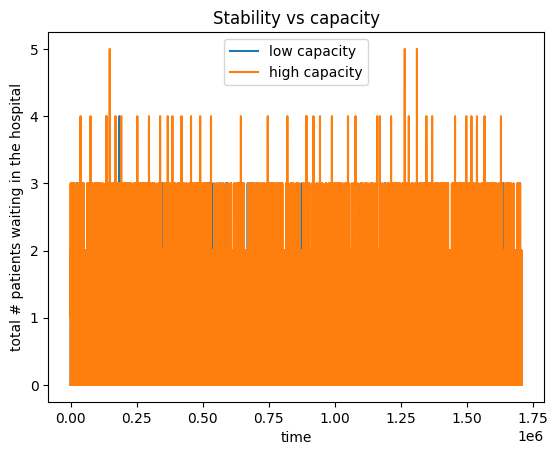

In [14]:
dC = 10
dE = 7

nR = 3       # from part a
nI = 417     # also from part a

configs = [
    ("low capacity", nR-1, dC-1, dE-1, nI-1),
    ("high capacity", nR+1, dC+1, dE+1, nI+1),]

for name, r, c, e, i in configs:
    out = simulate_hospital(r, c, e, i, T=50000)
    total = np.array(out["clinic_busy_samples"]) # modify to include ER+Clinic+IW+Recp
    plt.plot(total, label=name)

plt.legend()
plt.xlabel("time")
plt.ylabel("total # patients waiting in the hospital")
plt.title("Stability vs capacity")
plt.show()

The nearly solid orange rectangle indicates that the numbers stabilize; the system is stable with $0-3$ total patients waiting in the hospital most of the time and short-lived spikes up to $5$ patients otherwise. The spikes of two extra patients is pretty mild.

In [15]:
!pip install simpy

In [27]:
# sim_hospital.py
import simpy
import random

# Parameters (part b configuration)

# external arrival rates (per hour)
lambda_recp_ext = 20.0   # to reception (non-emergency)
lambda_er_ext = 5.0      # to ER

# staffing / capacities
nR = 3       # receptionists (choose as you like)
dC = 10      # clinic doctors (part b)
dE = 7       # ER doctors (part b)
nI = 500     # IW beds (part b)

# mean service times (hours)
mean_recp = 5.0 / 60.0      # 5 minutes
mean_clinic = 15.0 / 60.0   # 15 minutes = 0.25 hr
mean_er = 1.0               # 1 hour
mean_IW = 72.0              # 72 hours
mean_follow = 504.0         # 3 weeks = 504 hours

# Simulation controls
SIM_TIME = 20000.0     # total simulation hours
WARMUP = 2000.0        # warm-up hours to discard

random.seed(0)
np.random.seed(0)

def exp_mean(mean):
    return random.expovariate(1.0/mean)

class Hospital:
    def __init__(self, env):
        self.env = env
        # resources
        self.reception = simpy.Resource(env, capacity=nR)
        self.clinic = simpy.Resource(env, capacity=dC)
        self.er = simpy.Resource(env, capacity=dE)
        # IW modeled as resource with many servers = beds
        self.iw = simpy.Resource(env, capacity=nI)

        # statistics
        self.clinic_entry_times = []  # for each patient: (enter_time, exit_time)
        self.clinic_times = []        # time spent in clinic (post warmup)
        # track busy clinic doctors over time: we'll sample on events
        self.busy_clinic_samples_t = []
        self.busy_clinic_samples_v = []

    def record_busy_clinic(self):
        t = self.env.now
        busy = self.clinic.count  # number busy currently
        self.busy_clinic_samples_t.append(t)
        self.busy_clinic_samples_v.append(busy)

    # processes
    def reception_arrivals(self):
        while True:
            inter = exp_mean(1.0 / lambda_recp_ext)  # mean inter-arrival in hours
            yield self.env.timeout(inter)
            # spawn a patient process arriving to reception
            self.env.process(self.patient_through_reception())

    def er_arrivals(self):
        while True:
            inter = exp_mean(1.0 / lambda_er_ext)
            yield self.env.timeout(inter)
            self.env.process(self.patient_in_er())

    def patient_through_reception(self, is_followup=False):
        arrive = self.env.now
        # get receptionist
        with self.reception.request() as req:
            yield req
            # service time at reception
            yield self.env.timeout(exp_mean(mean_recp))
        # after reception, go to clinic queue
        # record clinic queue entry time
        clinic_entry = self.env.now
        self.record_busy_clinic()
        with self.clinic.request() as creq:
            yield creq
            # record actual service start time is now; we treat clinic time = service start to finish + time spent in queue
            # but easier: clinic entry -> after service finish compute total time
            start = self.env.now
            yield self.env.timeout(exp_mean(mean_clinic))
            finish = self.env.now
            # record clinic time if past warmup
            if finish >= WARMUP:
                self.clinic_times.append(finish - clinic_entry)
        # routing after clinic
        r = random.random()
        if r < 0.25:
            # follow-up: schedule arrival to reception after follow-up delay
            delay = exp_mean(mean_follow)
            def schedule_follow(env, tdelay):
                yield env.timeout(tdelay)
                env.process(self.patient_through_reception(is_followup=True))
            self.env.process(schedule_follow(self.env, delay))
        elif r < 0.35:
            # 10% to IW
            self.env.process(self.patient_to_iw())
        else:
            # discharged
            pass
        self.record_busy_clinic()

    def patient_in_er(self):
        arrive = self.env.now
        with self.er.request() as req:
            yield req
            yield self.env.timeout(exp_mean(mean_er))
        # routing: 50% to IW
        r = random.random()
        if r >= 0.5:
            self.env.process(self.patient_to_iw())

    def patient_to_iw(self):
        # join IW (wait for bed if none)
        with self.iw.request() as req:
            yield req
            # stay in IW
            yield self.env.timeout(exp_mean(mean_IW))
        # after IW, 20% discharged, else follow-up to reception
        r = random.random()
        if r >= 0.2:
            delay = exp_mean(mean_follow)
            def schedule_follow(env, tdelay):
                yield env.timeout(tdelay)
                env.process(self.patient_through_reception(is_followup=True))
            self.env.process(schedule_follow(self.env, delay))

def run_simulation():
    env = simpy.Environment()
    hospital = Hospital(env)
    # start external arrival generators
    env.process(hospital.reception_arrivals())
    env.process(hospital.er_arrivals())

    # also schedule periodic sampling of busy clinic (to build time-weighted avg)
    def sampler(env, hosp, interval=0.5):
        while True:
            hosp.record_busy_clinic()
            yield env.timeout(interval)
    env.process(sampler(env, hospital, interval=0.5))

    env.run(until=SIM_TIME)
    return hospital

if __name__ == "__main__":
    hosp = run_simulation()

    # compute time-weighted average busy clinic doctors after warmup
    t = np.array(hosp.busy_clinic_samples_t)
    v = np.array(hosp.busy_clinic_samples_v)
    mask = t >= WARMUP
    t2 = t[mask]
    v2 = v[mask]
    if len(t2) < 2:
        raise RuntimeError("Too short post-warmup.")
    dt = np.diff(t2)
    avg_busy = np.sum(v2[:-1] * dt) / (t2[-1] - t2[0])

    # average clinic time (hours)
    avg_clinic_time = np.mean(hosp.clinic_times) if len(hosp.clinic_times) > 0 else float("nan")
    median_clinic_time = np.median(hosp.clinic_times) if len(hosp.clinic_times) > 0 else float("nan")

Sim results (post-warmup):
Avg clinic time (hr): 0.3139070991238307  -> minutes: 18.834425947429843
Median clinic time (min): 14.404379503248492
Avg busy clinic doctors: 7.721820719384166
Num clinic completions recorded: 589893


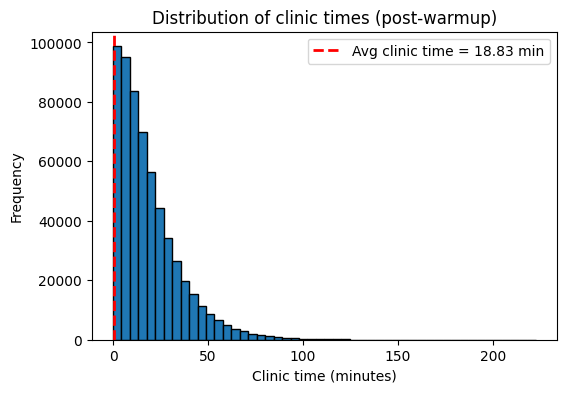

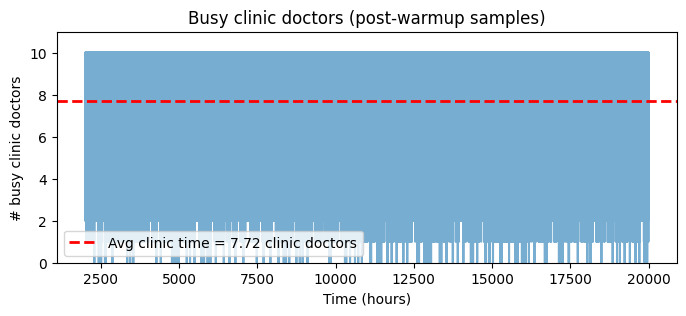

In [28]:
    print("Sim results (post-warmup):")
    print("Avg clinic time (hr):", avg_clinic_time, " -> minutes:", avg_clinic_time*60)
    print("Median clinic time (min):", median_clinic_time*60)
    print("Avg busy clinic doctors:", avg_busy)
    print("Num clinic completions recorded:", len(hosp.clinic_times))

    # Plot histogram of clinic times
    plt.figure(figsize=(6,4))
    plt.hist(np.array(hosp.clinic_times)*60, bins=50, edgecolor='k')
    plt.axvline(x=avg_clinic_time, color='red', linestyle='--', linewidth=2,
            label=f"Avg clinic time = {avg_clinic_time*60:.2f} min")
    plt.xlabel("Clinic time (minutes)")
    plt.ylabel("Frequency")
    plt.title("Distribution of clinic times (post-warmup)")
    plt.legend()
    plt.show()

    # Plot busy clinic doctors over time (smoothed)
    plt.figure(figsize=(8,3))
    plt.plot(t2[:-1], v2[:-1], alpha=0.6)
    plt.axhline(y=avg_busy, color='red', linestyle='--', linewidth=2,
            label=f"Avg clinic time = {avg_busy:.2f} clinic doctors")
    plt.xlabel("Time (hours)")
    plt.ylabel("# busy clinic doctors")
    plt.title("Busy clinic doctors (post-warmup samples)")
    plt.ylim(0, dC+1)
    plt.legend()
    plt.show()

Compare the above results to my answers in part (b):
- The simulated average time spent in the clinic (excluding reception) is $18.83$ min, which is exactly equal to the (rounded) theoretical result in part (b).
- The simulated average number of busy clinic doctors is $7.72$, which is close to the theoretical value of $8.209$ found in part (b). Factors causing this small discrepancy include the simulation having a finite time horizon, random arrival times (sampled from an exponential distribution), random service times, and random routing.